# Problem Set 2 CS129.18

The following problem set will revolve around the Pokemon stats dataset.
The dataset `data/Pokemon.csv` has **721** rows and **27** columns. Not all columns are needed for the questions to be asked.


## Requirements


>Gotta catch 'em all.

Using the lessons on Logistic Regression, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. How many Legendary Pokemon are there? ( 1pt )

2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )

3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )

4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )

5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )

6. What is the accuracy of your model?( 2pts )

7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )



-----


Bonus 1 : What is the difference between machine learning and pattern recognition? (1pt)

Bonus 2:  Who is your favorite Pokemon?

----

**Submit this file on Moodle on the submission link I will provide. This is due September 25 12nn.**

In [360]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings

warnings.filterwarnings(action="ignore")

In [361]:
df = pd.read_csv("data/Pokemon.csv")

In [362]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

## PS 2.1 Number of Legendary Pokemon

In [364]:
print('PS 2.1 Number of Legendary Pokemon')
len(df[df.isLegendary == True])

PS 2.1 Number of Legendary Pokemon


46

## PS 2.2 Pokemon with the highest attack-to-HP ratio

In [365]:
print('PS 2.2 Pokemon with the highest attack-to-HP ratio')

df['AttHpRatio'] = df['Attack']/df['HP']
df[['Name','AttHpRatio']].sort_values(by='AttHpRatio', ascending=False)

PS 2.2 Pokemon with the highest attack-to-HP ratio


,Name,AttHpRatio
291,Shedinja,90.000000
49,Diglett,5.500000
97,Krabby,3.500000
385,Deoxys,3.000000
139,Kabuto,2.666667
...,...,...
359,Wynaut,0.242105
201,Wobbuffet,0.173684
439,Happiny,0.050000
241,Blissey,0.039216


## PS 2.3 Binary classifier for whether Pokemon are Fire Type or not

In [366]:
print('PS 2.3 Binary classifier for whether Pokemon are Fire Type or not')
# CREATE A BOOL COLUMN FOR isFire
'''
df1 = df.Type_1.str.get_dummies()
df1.columns = ['is' + col for col in df1.columns]
df2 = df.Type_2.str.get_dummies()
df2.columns = ['is' + col for col in df2.columns]
columns = [col for col in df1.columns]
'''

df['isFire'] = (df['Type_1'] == 'Fire') | (df['Type_2'] == 'Fire')

'''
print(len(df[df.isFire == True]))
df['isFire']

data = df
def updateTypeColumn(dataframe, columnName, columnValue):
    for index, row in dataframe.iterrows():
        if row.Type_1 == columnValue:
            dataframe.loc[index, columnName] = 1
        else:
            dataframe.loc[index, columnName] = 0
            
updateTypeColumn(data, 'Type_1', 'isFire')
data['Type_1'] = data['Type_1'].apply(bool)
df['isFire']'''

PS 2.3 Binary classifier for whether Pokemon are Fire Type or not


"\nprint(len(df[df.isFire == True]))\ndf['isFire']\n\ndata = df\ndef updateTypeColumn(dataframe, columnName, columnValue):\n    for index, row in dataframe.iterrows():\n        if row.Type_1 == columnValue:\n            dataframe.loc[index, columnName] = 1\n        else:\n            dataframe.loc[index, columnName] = 0\n            \nupdateTypeColumn(data, 'Type_1', 'isFire')\ndata['Type_1'] = data['Type_1'].apply(bool)\ndf['isFire']"

## PS 2.4 Attributes and stats of all Legendary Type pokemon using boxplots

PS 2.4 Attributes and stats of all Legendary Type pokemon using boxplots


<AxesSubplot:>

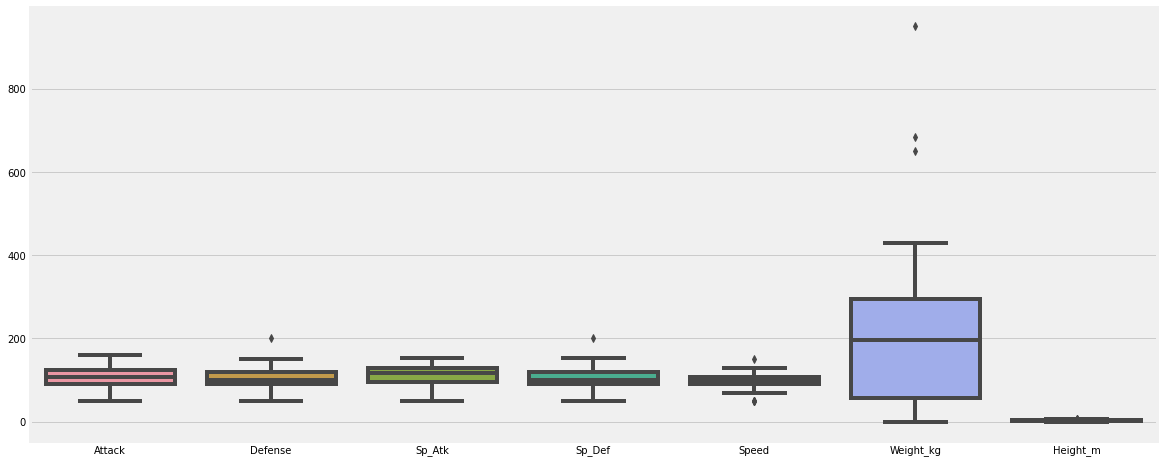

In [367]:
print('PS 2.4 Attributes and stats of all Legendary Type pokemon using boxplots')
plt.figure(figsize=(18,8))
df3 = df[(df['isLegendary'] ==True)]
df3 = df3[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
sns.boxplot(data = df3)

## PS 2.5 Probability of each Pokemon being a Fire Type

### Input Additional variables

In [368]:
d = [df.dtypes]
d

[Number                int64
 Name                 object
 Type_1               object
 Type_2               object
 Total                 int64
 HP                    int64
 Attack                int64
 Defense               int64
 Sp_Atk                int64
 Sp_Def                int64
 Speed                 int64
 Generation            int64
 isLegendary            bool
 Color                object
 hasGender              bool
 Pr_Male             float64
 Egg_Group_1          object
 Egg_Group_2          object
 hasMegaEvolution       bool
 Height_m            float64
 Weight_kg           float64
 Catch_Rate            int64
 Body_Style           object
 AttHpRatio          float64
 isFire                 bool
 dtype: object]

In [369]:
df[['Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'Catch_Rate', 'Body_Style']]

,Pr_Male,Egg_Group_1,Egg_Group_2,Catch_Rate,Body_Style
0,0.875,Monster,Grass,45,quadruped
1,0.875,Monster,Grass,45,quadruped
2,0.875,Monster,Grass,45,quadruped
3,0.875,Monster,Dragon,45,bipedal_tailed
4,0.875,Monster,Dragon,45,bipedal_tailed
...,...,...,...,...,...
716,NaN,Undiscovered,NaN,45,two_wings
717,NaN,Undiscovered,NaN,3,serpentine_body
718,NaN,Undiscovered,NaN,3,head_arms
719,NaN,Undiscovered,NaN,3,head_only


In [370]:
col = pd.get_dummies(df.Color,prefix='Color')
col2 = pd.get_dummies(df.Body_Style,prefix='body_style')
df = df.join(col)
df = df.join(col2)

<AxesSubplot:>

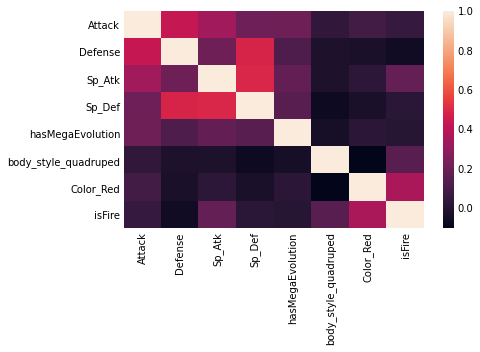

In [371]:
# plt.subplots(figsize = (18,5))
sns.heatmap(df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "hasMegaEvolution", "body_style_quadruped", "Color_Red","isFire"]].corr(method='pearson'))

<AxesSubplot:>

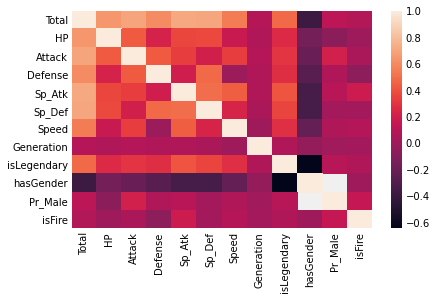

In [372]:
sns.heatmap(df[[
    'Total',           
    'HP',              
    'Attack',          
    'Defense',         
    'Sp_Atk',          
    'Sp_Def',          
    'Speed',           
    'Generation',      
    'isLegendary',     
    'Color',           
    'hasGender',       
    'Pr_Male',      
    'isFire'
    ]].corr(method='pearson'))

<AxesSubplot:>

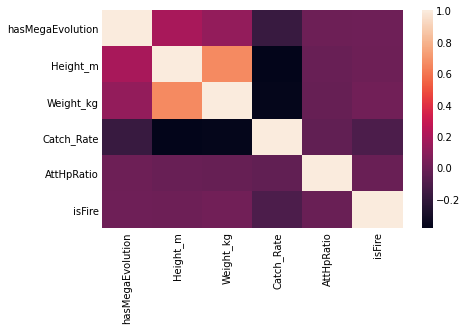

In [373]:
sns.heatmap(df[[
'Egg_Group_1',     
    'Egg_Group_2',     
    'hasMegaEvolution',
    'Height_m',        
    'Weight_kg',       
    'Catch_Rate',      
    'Body_Style',      
    'AttHpRatio',      
    'isFire',          
    ]].corr(method='pearson'))

<AxesSubplot:>

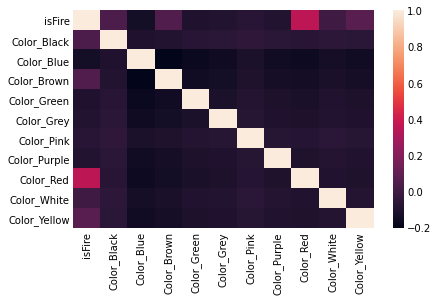

In [374]:
sns.heatmap(df[[
 'isFire',   
 'Color_Black', 
 'Color_Blue', 
 'Color_Brown', 
 'Color_Green', 
 'Color_Grey', 
 'Color_Pink', 
 'Color_Purple', 
 'Color_Red', 
 'Color_White', 
 'Color_Yellow',]].corr(method='pearson'))

<AxesSubplot:>

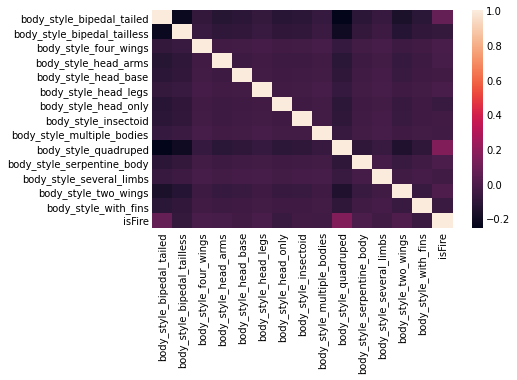

In [375]:
sns.heatmap(df[[
    
    'body_style_bipedal_tailed',        
    'body_style_bipedal_tailless',     
    'body_style_four_wings',      
    'body_style_head_arms',        
    'body_style_head_base',        
    'body_style_head_legs',        
    'body_style_head_only',        
    'body_style_insectoid',        
    'body_style_multiple_bodies',  
    'body_style_quadruped',        
    'body_style_serpentine_body',  
    'body_style_several_limbs',    
    'body_style_two_wings',        
    'body_style_with_fins',
    'isFire']].corr(method='pearson'))

In [376]:
df = df.drop([
    'Color_Black', 
    'Color_Blue', 
    'Color_Brown', 
    'Color_Green', 
    'Color_Grey', 
    'Color_Pink', 
    'Color_Purple', 
    'Color_White', 
    'Color_Yellow',
    'body_style_bipedal_tailed',        
    'body_style_bipedal_tailless',     
    'body_style_four_wings',      
    'body_style_head_arms',        
    'body_style_head_base',        
    'body_style_head_legs',        
    'body_style_head_only',        
    'body_style_insectoid',        
    'body_style_multiple_bodies',
    'body_style_serpentine_body',  
    'body_style_several_limbs',    
    'body_style_two_wings',        
    'body_style_with_fins',
],axis=1)

<Figure size 720x576 with 0 Axes>

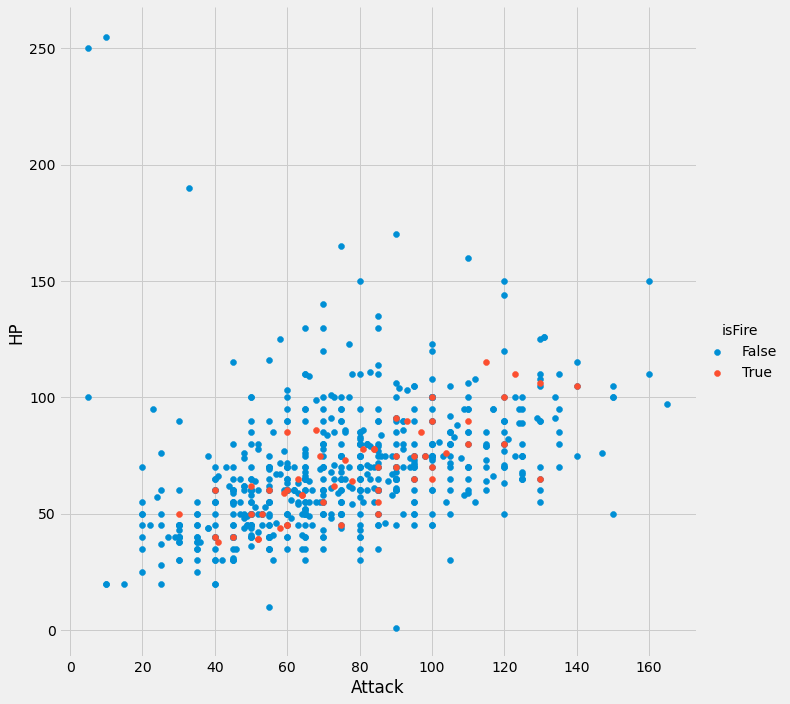

In [377]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.FacetGrid(df, hue="isFire", size = 10).map(plt.scatter, "Attack", "HP").add_legend()

In [400]:
print('PS 2.5 Probability of each Pokemon being a Fire Type')
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m", "Catch_Rate"]]

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X, df["isFire"])
predictions = logistic_model.predict(X)
accuracy = metrics.accuracy_score(predictions,df["isFire"])
print(accuracy)

PS 2.5 Probability of each Pokemon being a Fire Type
0.6934812760055479


In [379]:
df["pred"] = predictions
prob =[x[1] for x in logistic_model.predict_proba(X)]

df["prob"] = prob
selection = df[["Name","isLegendary","pred", "prob"]]
selection[selection["isLegendary"] == True].sample(20)

,Name,isLegendary,pred,prob
383,Rayquaza,True,False,0.330489
638,Terrakion,True,False,0.490008
484,Heatran,True,True,0.843195
144,Zapdos,True,True,0.766349
718,Diancie,True,False,0.158474
643,Zekrom,True,True,0.638786
642,Reshiram,True,True,0.801943
376,Regirock,True,False,0.015394
384,Jirachi,True,True,0.631389
243,Entei,True,True,0.618775


In [380]:
logistic_model.coef_

array([[ 0.0099117 , -0.0273439 ,  0.03579905, -0.01279816, -0.00081883,
         0.00302111, -0.64612209, -0.00524436]])

In [381]:
pd.DataFrame(list(zip(X.columns, logistic_model.coef_)))

,0,1
0,Attack,"[0.009911703790240338, -0.027343896009033503, ..."


In [382]:
logistic_model = LogisticRegression(class_weight="balanced")

from sklearn.model_selection import  train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]], 
                                                    df[['isLegendary']], train_size = 0.55)


logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [383]:
train_accuracy

0.9696969696969697

In [384]:
test_accuracy

0.9815384615384616

In [385]:
print('PS 2.7 Accuracy of the Model')
accuracy

PS 2.7 Accuracy of the Model


0.6934812760055479

In [386]:
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test))
print("Precision:",metrics.precision_score(Y_test, pred_test))
print("Recall:",metrics.recall_score(Y_test, pred_test))

Accuracy: 0.9815384615384616
Precision: 0.7391304347826086
Recall: 1.0


In [387]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_train, pred_train)
cnf_matrix

array([[355,  12],
       [  0,  29]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

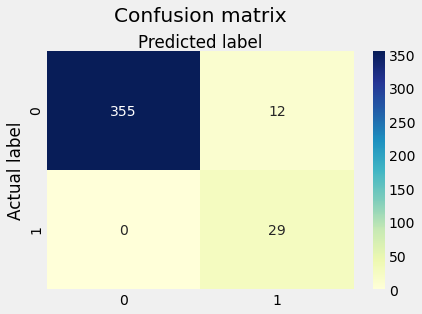

In [388]:
class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [389]:
X.head()

,Attack,Defense,Sp_Atk,Sp_Def,Speed,Weight_kg,Height_m,Catch_Rate
0,49,49,65,65,45,6.9,0.71,45
1,62,63,80,80,60,13.0,0.99,45
2,82,83,100,100,80,100.0,2.01,45
3,52,43,60,50,65,8.5,0.61,45
4,64,58,80,65,80,19.0,1.09,45


In [390]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   data["isFire"], 
                   test_size=0.7,  
                   train_size=0.3,    
                   random_state=42)


logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

#### PS 2.8 Upsampling for the minority class that is Fire Type
show the change in Accuracy and Precision

In [391]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X, df["isLegendary"])
predictions = logistic_model.predict(X)
accuracy = metrics.accuracy_score(predictions,df["isLegendary"])
print(accuracy)

0.9750346740638003


In [392]:
print('PS 2.8 Upsampling for Fire Type')
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

df = df.reset_index()
X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]


X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["isFire"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42)

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

PS 2.8 Upsampling for Fire Type


In [393]:
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test))
print("Precision:",metrics.precision_score(Y_test, pred_test)) # Specificity
print("Recall:",metrics.recall_score(Y_test, pred_test)) # Sensitivity

Accuracy: 0.7465437788018433
Precision: 0.13793103448275862
Recall: 0.6153846153846154


In [394]:
X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["isFire"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42)

X = pd.concat([X_train, Y_train], axis=1)

# separate minority and majority classes
not_fire_type = X[X.isFire==False]
fire_type = X[X.isFire==True]

fire_type_upsampled = resample(fire_type,
                          replace=True, # sample with replacement
                          n_samples=len(not_fire_type), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
fire_type_upsampled = pd.concat([not_fire_type, fire_type_upsampled])

# check new class counts
fire_type_upsampled.isFire.value_counts()

False    461
True     461
Name: isFire, dtype: int64

In [395]:
Y_train = fire_type_upsampled.isFire
X_train = fire_type_upsampled.drop('isFire', axis=1)

fire_type_upsampled = LogisticRegression(class_weight="balanced", solver="liblinear").fit(X_train, Y_train)

upsampled_pred = fire_type_upsampled.predict(X_test)

In [396]:
print("Accuracy:",metrics.accuracy_score(Y_test, upsampled_pred))
print("Precision:",metrics.precision_score(Y_test, upsampled_pred))
print("Recall:",metrics.recall_score(Y_test, upsampled_pred))

Accuracy: 0.7511520737327189
Precision: 0.15254237288135594
Recall: 0.6923076923076923


Text(0.5, 257.44, 'Predicted label')

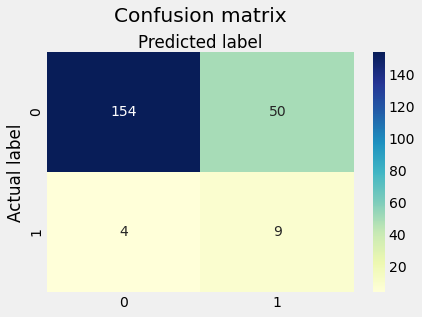

In [397]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, upsampled_pred)
cnf_matrix

class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [399]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   data["isFire"], 
                   test_size=0.7,  
                   train_size=0.3,    
                   random_state=42)


logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

ValueError: Found input variables with inconsistent numbers of samples: [504, 721]

In [ ]:
data["pred"] = pred
prob =[x[1] for x in lm.predict_proba(X)]

# data["prob"] = prob
# selection = data[["Name","isLegendary","pred", "prob"]]
# selection[selection["Type_1"] == True].head()

In [ ]:
data[data["isFire"]==data["pred"]]

In [ ]:
sel = data[["Name","Type_1","pred", "prob"]]
sel